In [140]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa as librosa
import librosa.display
import IPython.display as ipd

In [141]:

input_audio = keras.Input(shape =(28,28,1))

x = layers.Conv2D(16,(3,3), activation ='relu', padding = 'same')(input_audio)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2D(8,(3,3), activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2D(8,(3,3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2,2), padding = 'same')(x)

x = layers.Conv2D(8,(3,3), activation ='relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3), activation ='relu', padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3), activation = 'relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = keras.Model(input_audio, decoded)

In [142]:
autoencoder.summary()
x_test.shape

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 8)           0  

(10000, 28, 28, 1)

In [143]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [144]:
(x_train, _), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1))
y_train = np.copy(x_train)
x_train += np.random.rand(*x_train.shape)*.7
x_train = np.minimum(x_train, 1)

In [149]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train, y_train, epochs = 5, batch_size=128, shuffle=True, validation_data = (x_test, x_test))

Epoch 1/5
469/469 [==============================] - 28s 60ms/step - loss: 0.1161 - val_loss: 0.1462
Epoch 2/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1147 - val_loss: 0.1402
Epoch 3/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1137 - val_loss: 0.1346
Epoch 4/5
469/469 [==============================] - 30s 64ms/step - loss: 0.1128 - val_loss: 0.1357
Epoch 5/5
469/469 [==============================] - 29s 62ms/step - loss: 0.1119 - val_loss: 0.1299


In [150]:
decoded_audio = autoencoder.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

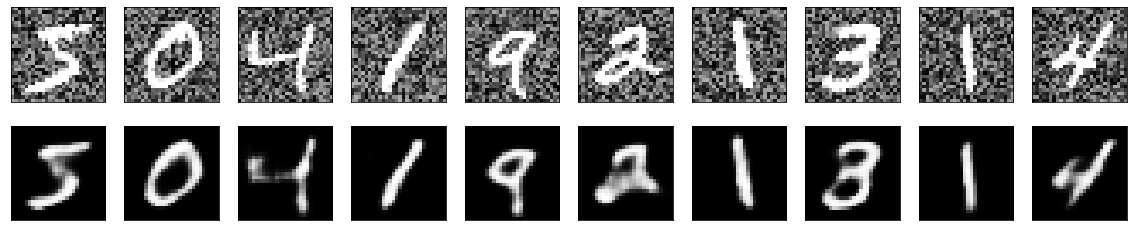

In [151]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_audio[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show
    